In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from ast import literal_eval

data = pd.read_csv("data/movies_metadata.csv")
data = data[data['original_language']=='en']
data = data[['budget', 'genres','id', 'imdb_id','original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']]
data = data[(data['genres'] != "[]")]
data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data = data[(data.T != 0).all()]
data.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,30/10/1995,373554033.0,81.0,7.7,5415.0
1,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,15/12/1995,262797249.0,104.0,6.9,2413.0
3,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,22/12/1995,81452156.0,127.0,6.1,34.0
5,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,Heat,17.924927,15/12/1995,187436818.0,170.0,7.7,1886.0
8,35000000.0,"[Action, Adventure, Thriller]",9091.0,tt0114576,Sudden Death,5.231580,22/12/1995,64350171.0,106.0,5.5,174.0


In [3]:
reg = sk.LinearRegression()
reg.fit(data[['budget']],data['revenue'])


LinearRegression()

In [4]:
coe = reg.coef_
coe

array([3.03858072])

In [5]:
interce = reg.intercept_
interce

-4368691.9359585345

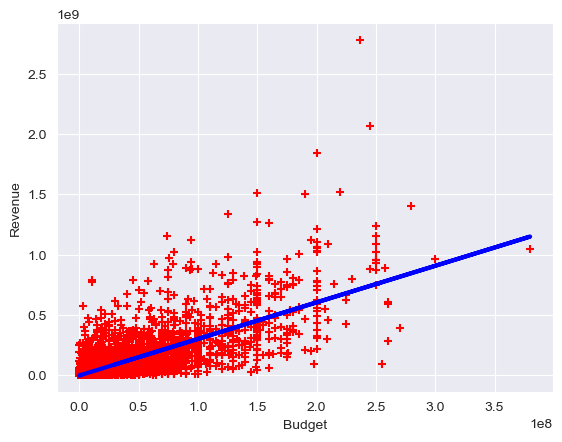

In [6]:
plt.scatter(data['budget'], data['revenue'], marker="+", color="red")
plt.plot(data[['budget']],reg.predict(data[['budget']]),color="blue",linewidth=3) #line
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [7]:
x = 3000000
y = coe*x + interce
y

array([4747050.21397318])

In [8]:
reg.score(data[['budget']],data['revenue'])

0.5284948135740066

Correlation between budget and revenue is:  0.7269764876349211


Text(0, 0.5, 'Budget')

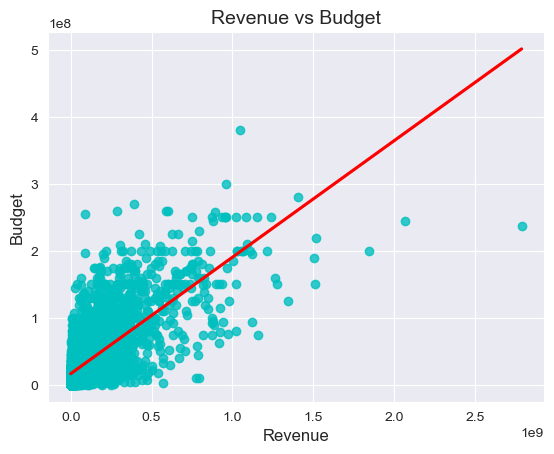

In [17]:
# find correlation between budget and revenue
data_corr = data.corr()
print("Correlation between budget and revenue is: ", data_corr.loc['revenue','budget'])

ax = sns.regplot(x=data['revenue'], y=data['budget'], color='c', ci=None, line_kws={'color': 'red'})
ax.set_title("Revenue vs Budget", fontsize=14)
ax.set_xlabel("Revenue", fontsize=12)
ax.set_ylabel("Budget", fontsize=12)


Correlation between Popularity And Profit is:  0.4296927317848958


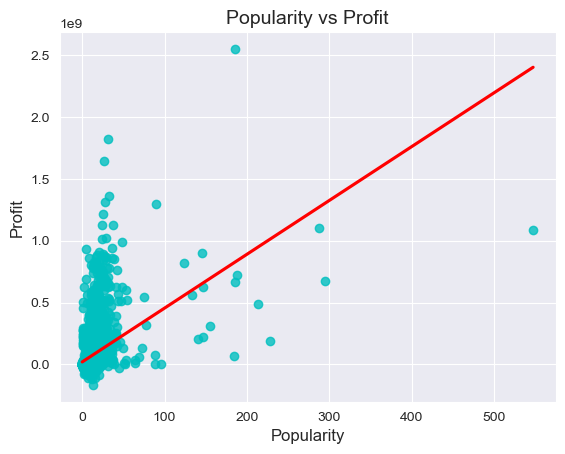

In [18]:
# find correlation between popularity and Profit
data['Profit'] = data['revenue'] - data['budget']
data_corr2 = data.corr()
ax = sns.regplot(x=data['popularity'], y=data['Profit'], color='c', ci=None, line_kws={'color': 'red'})
ax.set_title("Popularity vs Profit", fontsize=14)
ax.set_xlabel("Popularity", fontsize=12)
ax.set_ylabel("Profit", fontsize=12)
print("Correlation between Popularity And Profit is: ", data_corr2.loc['popularity','Profit'])

In [14]:
month_release = data['release_date'].dt.year
month_release

AttributeError: Can only use .dt accessor with datetimelike values

C:\Users\ch__s\AppData\Local\Temp\ipykernel_23012\2863901353.py:3: UserWarning: Parsing '30/10/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])
C:\Users\ch__s\AppData\Local\Temp\ipykernel_23012\2863901353.py:3: UserWarning: Parsing '15/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])
C:\Users\ch__s\AppData\Local\Temp\ipykernel_23012\2863901353.py:3: UserWarning: Parsing '22/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])
C:\Users\ch__s\AppData\Local\Temp\ipykernel_23012\2863901353.py:3: UserWarning: Parsing '16/11/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['releas

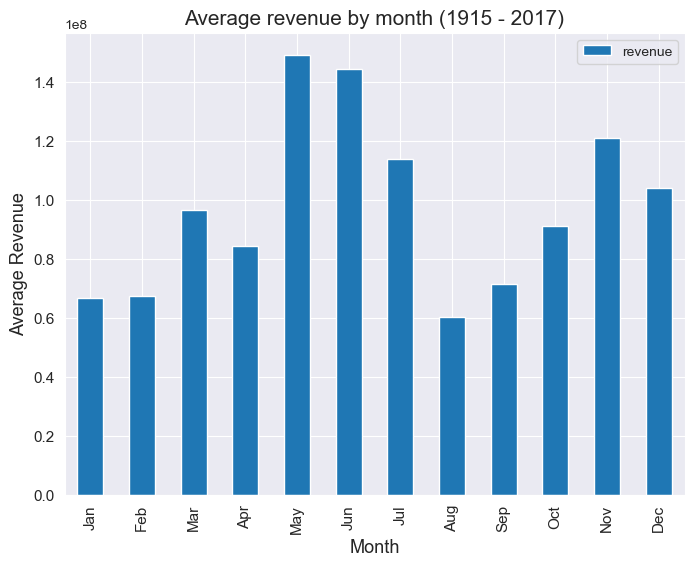

In [15]:
# change string format to datetime format
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'].head()

month_release = data['release_date'].dt.month


month_release = pd.DataFrame(month_release)
month_release.rename(columns = {'release_date':'release_month'},inplace=True)
month_release['revenue'] = data['revenue']
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

plt.title('Average revenue by month (1915 - 2017)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

<AxesSubplot:xlabel='revenue', ylabel='runtime'>

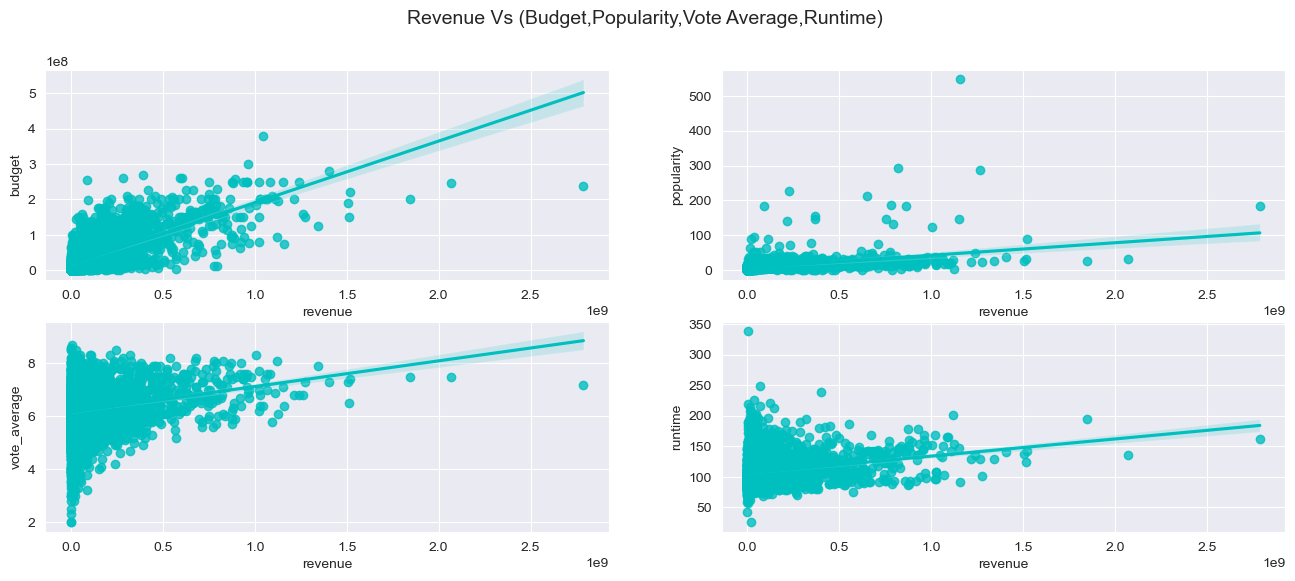

In [16]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=data['revenue'], y=data['budget'],color='c',ax=axes[0][0])
sns.regplot(x=data['revenue'], y=data['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=data['revenue'], y=data['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=data['revenue'], y=data['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])


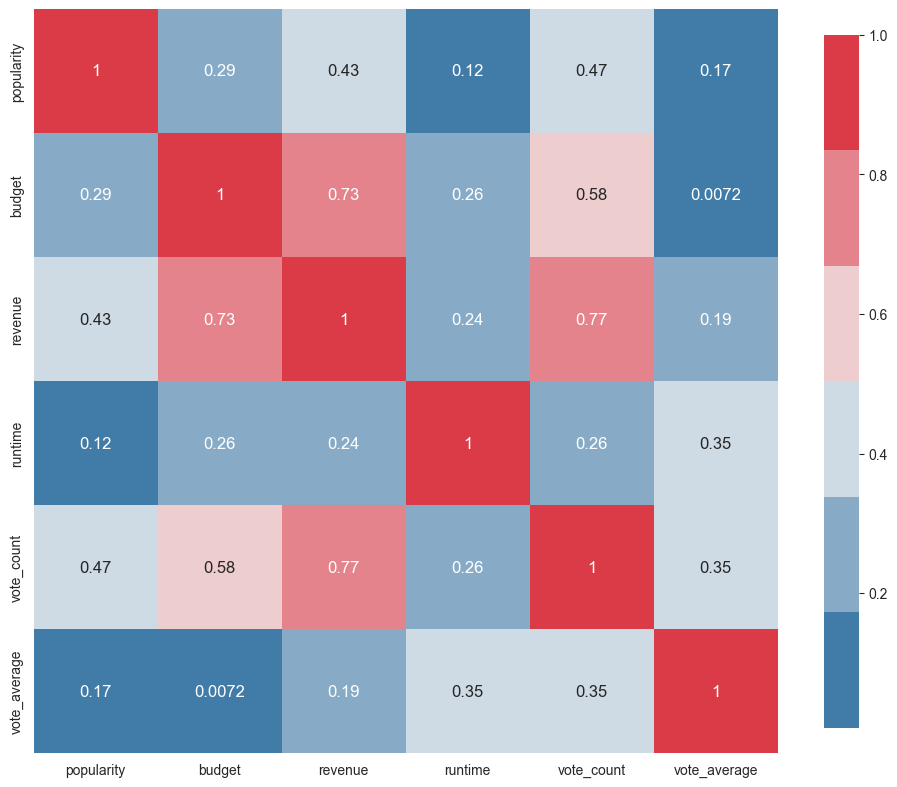

In [53]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize = ( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

<AxesSubplot: >

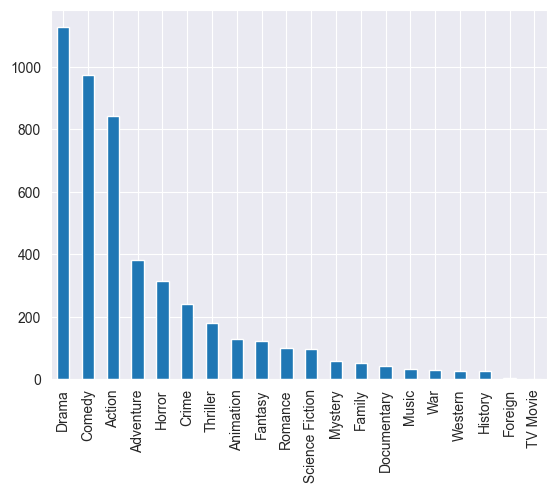

In [58]:
genres = data['genres'].str[0]
data1 = pd.Series(genres)
count = data1.value_counts(ascending=False)
count

count.plot(kind="bar")